In [2]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
discount = 0.995

In [4]:
# load pkl file expert_return.pkl
with open('data/expert_return.pkl', 'rb') as f:
    expert_return = pkl.load(f)
# load mixed returns
with open('data/mixed_return.pkl', 'rb') as f:
    mixed_returns = pkl.load(f)


In [5]:
# mult discount factor
expert_return = np.array(expert_return) * (1 - discount)
mixed_returns = np.array(mixed_returns) * (1 - discount)

Text(0.5, 1.0, 'average discounted return for expert and mixed REAL dataset')

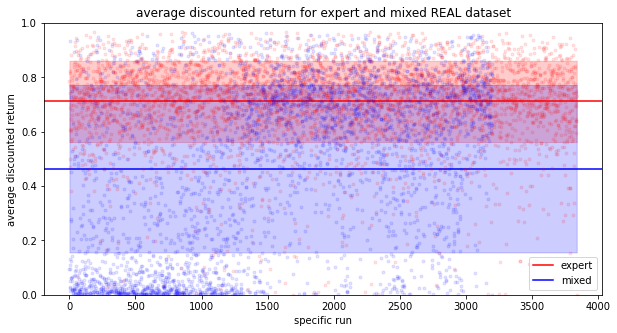

In [6]:
# plot mean expert and mixed return with std
plt.figure(figsize=(10, 5))

plt.axhline(y=np.mean(expert_return), color='r', linestyle='-', label='expert')
plt.axhline(y=np.mean(mixed_returns), color='b', linestyle='-', label='mixed')
# add the individual runs very small points
plt.plot(np.arange(len(expert_return)), expert_return, 'r.', alpha=0.1)
plt.plot(np.arange(len(mixed_returns)), mixed_returns, 'b.', alpha=0.1)
plt.fill_between(np.arange(len(expert_return)),
                    np.mean(expert_return, axis=0) - np.std(expert_return, axis=0),
                    np.mean(expert_return, axis=0) + np.std(expert_return, axis=0),
                    alpha=0.2, color='r')
plt.fill_between(np.arange(len(expert_return)),
                    np.mean(mixed_returns, axis=0) - np.std(mixed_returns, axis=0),
                    np.mean(mixed_returns, axis=0) + np.std(mixed_returns, axis=0),
                    alpha=0.2, color='b')
plt.legend()
plt.xlabel('specific run')
plt.ylabel('average discounted return')
# fix y axis to be 0 to 1
plt.ylim(0, 1)
plt.title('average discounted return for expert and mixed REAL dataset')



In [7]:
#data/no_noise_0_995.pkl'
def read_mc(path):
    # unpickle whole file
    returns = []
    with open(path, 'rb') as f:
        # unpickle until the end of the file
        while True:
            try:
                x = pkl.load(f)
                returns.append(x)
            except EOFError:
                break

    print(len(returns))
    # print the length of each eleeent in the list
    # create list only consisting of the values of the arrays
    out = []
    for i in range(len(returns)):
        try:
            len(returns[i]) # is list or smth would be better
            out += returns[i]
        except:
            pass # no array
    print(len(out))
    return np.array(out) * (1 - discount)


In [8]:
def read_sucesses(path): # not available for all datasets
    # unpickle whole file
    returns = []
    with open(path, 'rb') as f:
        # unpickle until the end of the file
        while True:
            try:
                x = pkl.load(f)
                returns.append(x)
            except EOFError:
                break
    # print every integer
    c = 0
    sum = 0
    for i in range(len(returns)):
        if isinstance(returns[i],int):
            c += 1
            sum += returns[i]
    print(f"successes: {sum} / {c * 15}")
#read_sucesses('data/random_noisy_0_3_discount_0_995.pkl')
read_sucesses('data/random_noisy_0_2_discount_0_995.pkl')

successes: 45 / 2505


In [9]:
# now load the simulated data
# load noisy_05 noisy_2 and no_noise
with open('data/noisy_05.pkl', 'rb') as f:
    rewards_05 = pkl.load(f)
    ep_stats_05 = pkl.load(f)
    infos_05 = pkl.load(f)
with open('data/noisy_2.pkl', 'rb') as f:
    rewards_2 = pkl.load(f)
    ep_stats_2 = pkl.load(f)
    infos_2 = pkl.load(f)
with open('data/no_noise.pkl', 'rb') as f:
    rewards_no = pkl.load(f)
    ep_stats_no = pkl.load(f)
    infos_no = pkl.load(f)
# apply discounts to the rewards
rewards_05 = read_mc("data/expert_noisy_0_05_discount_0_995.pkl")# np.array(rewards_05) * (1 - discount)
rewards_2 = read_mc("data/expert_noisy_0_2_discount_0_995.pkl") #np.array(rewards_2) * (1 - discount)
rewards_no =  read_mc('data/no_noise_0_995.pkl') #np.array(rewards_no) * (1 - discount)
rewards_random = read_mc('data/random_noisy_0_2_discount_0_995.pkl')


519
2595
840
4200
630
4669
501
2505


(0.0, 1.0)

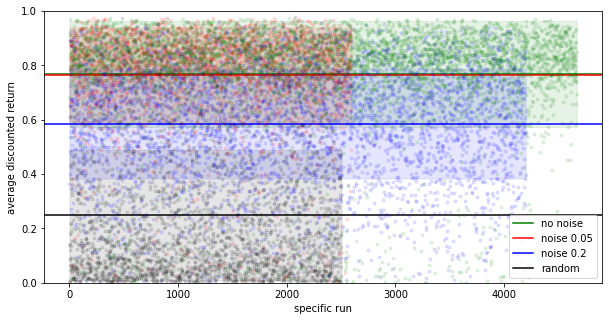

In [10]:
# plot the rewards for the different noise levels including the mean and std deviations
plt.figure(figsize=(10, 5))
plt.axhline(y=np.mean(rewards_no), color='g', linestyle='-', label='no noise')
plt.axhline(y=np.mean(rewards_05), color='r', linestyle='-', label='noise 0.05')
plt.axhline(y=np.mean(rewards_2), color='b', linestyle='-', label='noise 0.2')
# add random rewards
plt.axhline(y=np.mean(rewards_random), color='k', linestyle='-', label='random')
# add the individual runs very small points
plt.plot(np.arange(len(rewards_05)), rewards_05, 'r.', alpha=0.1)
plt.plot(np.arange(len(rewards_2)), rewards_2, 'b.', alpha=0.1)
plt.plot(np.arange(len(rewards_no)), rewards_no, 'g.', alpha=0.1)
plt.plot(np.arange(len(rewards_random)), rewards_random, 'k.', alpha=0.1)

plt.fill_between(np.arange(len(rewards_05)),
                    np.mean(rewards_05, axis=0) - np.std(rewards_05, axis=0),
                    np.mean(rewards_05, axis=0) + np.std(rewards_05, axis=0),
                    alpha=0.1, color='r')

plt.fill_between(np.arange(len(rewards_2)),
                    np.mean(rewards_2, axis=0) - np.std(rewards_2, axis=0),
                    np.mean(rewards_2, axis=0) + np.std(rewards_2, axis=0),
                    alpha = 0.1, color='b')
plt.fill_between(np.arange(len(rewards_no)),
                    np.mean(rewards_no, axis=0) - np.std(rewards_no, axis=0),
                    np.mean(rewards_no, axis=0) + np.std(rewards_no, axis=0),
                    alpha = 0.1, color='g')

plt.fill_between(np.arange(len(rewards_random)),
                    np.mean(rewards_random, axis=0) - np.std(rewards_random, axis=0),
                    np.mean(rewards_random, axis=0) + np.std(rewards_random, axis=0),
                    alpha = 0.1, color='k')

plt.legend()
plt.xlabel('specific run')
plt.ylabel('average discounted return')
# fix y axis to be 0 to 1
plt.ylim(0, 1)


In [13]:
print(np.mean(rewards_no))
print(np.mean(rewards_05))

0.7685157178182095
0.7655677926643241


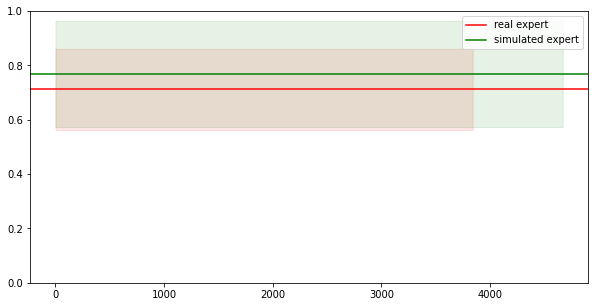

In [12]:
# compare simulated to real expert
plt.figure(figsize=(10, 5))
plt.axhline(y=np.mean(expert_return), color='r', linestyle='-', label='real expert')
plt.fill_between(np.arange(len(expert_return)),
                    np.mean(expert_return, axis=0) - np.std(expert_return, axis=0),
                    np.mean(expert_return, axis=0) + np.std(expert_return, axis=0),
                    alpha=0.1, color='r')
plt.axhline(y=np.mean(rewards_no), color='g', linestyle='-', label='simulated expert')
plt.fill_between(np.arange(len(rewards_no)),
                    np.mean(rewards_no, axis=0) - np.std(rewards_no, axis=0),
                    np.mean(rewards_no, axis=0) + np.std(rewards_no, axis=0),
                    alpha = 0.1, color='g')

# fix to 0 1
plt.ylim(0, 1)
# legend
plt.legend()


In [14]:
import tensorflow as tf

In [15]:
import os

In [16]:
# load the tf events files from the path logdir/benchmark3 that are in the list runs
runs = ["algo=iw,env_name=trifinger-cube-push-real-mixed-v0,noise_scale=0.0,seed=0,std=0.05,target_policy_noisy=False,time=2023-07-05-09-54-13,trifinger_policy_class=trifinger_rl_example.example.TorchPushPolicy"]
# load the data from the tf events files


In [17]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import struct

In [18]:
data = [
    "algo=iw,env_name=trifinger-cube-push-real-mixed-v0,noise_scale=0.0,seed=0,std=0.05,target_policy_noisy=False,time=2023-07-05-09-54-13,trifinger_policy_class=trifinger_rl_example.example.TorchPushPolicy", #/events.out.tfevents.1688550853.215a15911d8e.2158.0.v2",
    "algo=iw,env_name=trifinger-cube-push-real-mixed-v0,noise_scale=0.0,seed=0,std=0.2,target_policy_noisy=True,time=2023-07-05-09-54-13,trifinger_policy_class=trifinger_rl_example.example.TorchPushPolicy",
    "algo=fqe,env_name=trifinger-cube-push-real-mixed-v0,noise_scale=0.0,seed=0,std=0.05,target_policy_noisy=False,time=2023-07-05-20-57-22,trifinger_policy_class=trifinger_rl_example.example.TorchPushPolicy",
    "algo=fqe,env_name=trifinger-cube-push-real-mixed-v0,noise_scale=0.0,seed=0,std=0.2,target_policy_noisy=True,time=2023-07-05-21-04-11,trifinger_policy_class=trifinger_rl_example.example.TorchPushPolicy",
    "algo=mb,env_name=trifinger-cube-push-real-mixed-v0,noise_scale=0.0,seed=0,std=0.05,target_policy_noisy=False,time=2023-07-05-17-48-45,trifinger_policy_class=trifinger_rl_example.example.TorchPushPolicy",
    "algo=mb,env_name=trifinger-cube-push-real-mixed-v0,noise_scale=0.0,seed=0,std=0.2,target_policy_noisy=True,time=2023-07-05-17-48-45,trifinger_policy_class=trifinger_rl_example.example.TorchPushPolicy",
    "algo=dr,env_name=trifinger-cube-push-real-mixed-v0,noise_scale=0.0,seed=0,std=0.05,target_policy_noisy=False,time=2023-07-05-11-39-21,trifinger_policy_class=trifinger_rl_example.example.TorchPushPolicy",
    "algo=dr,env_name=trifinger-cube-push-real-mixed-v0,noise_scale=0.0,seed=0,std=0.2,target_policy_noisy=True,time=2023-07-05-12-01-28,trifinger_policy_class=trifinger_rl_example.example.TorchPushPolicy",
    "algo=dual_dice,env_name=trifinger-cube-push-real-mixed-v0,noise_scale=0.0,seed=0,std=0.05,target_policy_noisy=False,time=2023-07-05-23-33-46,trifinger_policy_class=trifinger_rl_example.example.TorchPushPolicy",
    "algo=dual_dice,env_name=trifinger-cube-push-real-mixed-v0,noise_scale=0.0,seed=0,std=0.2,target_policy_noisy=True,time=2023-07-05-23-47-56,trifinger_policy_class=trifinger_rl_example.example.TorchPushPolicy",
    # "algo=mb,env_name=trifinger-cube-push-real-mixed-v0,noise_scale=0.0,seed=0,std=0.05,target_policy_noisy=False,time=2023-08-01-12-11-37,trifinger_policy_class=trifinger_rl_example.example.TorchRandomPolicy",
    "algo=mb,env_name=trifinger-cube-push-real-mixed-v0,noise_scale=0.0,seed=0,std=0.2,target_policy_noisy=True,time=2023-08-01-14-49-17,trifinger_policy_class=trifinger_rl_example.example.TorchRandomPolicy",
    # "algo=fqe,env_name=trifinger-cube-push-real-mixed-v0,noise_scale=0.0,seed=0,std=0.05,target_policy_noisy=False,time=2023-08-01-17-34-38,trifinger_policy_class=trifinger_rl_example.example.TorchRandomPolicy",
    "algo=fqe,env_name=trifinger-cube-push-real-mixed-v0,noise_scale=0.0,seed=0,std=0.2,target_policy_noisy=True,time=2023-08-01-19-41-12,trifinger_policy_class=trifinger_rl_example.example.TorchRandomPolicy",
    "algo=iw,env_name=trifinger-cube-push-real-mixed-v0,noise_scale=0.0,seed=0,std=0.2,target_policy_noisy=False,time=2023-08-02-07-49-17,trifinger_policy_class=trifinger_rl_example.example.TorchRandomPolicy",
    "algo=dr,env_name=trifinger-cube-push-real-mixed-v0,noise_scale=0.0,seed=0,std=0.2,target_policy_noisy=True,time=2023-08-03-07-03-49,trifinger_policy_class=trifinger_rl_example.example.TorchRandomPolicy",
]

In [19]:
print(len(data))

14


In [20]:
# find the tf events files in the path logdir/benchmark3/FOLDER where FOLDER is in the list data
logdir = "logdir/benchmark3"
data_file = []
for folder in data:
    dir = logdir+"/"+folder
    data_file.append(dir + "/"+ os.listdir(dir)[0])


In [21]:
all_returns = []
for file in data_file:
    returns = []
    for e in summary_iterator(file):    
        for v in e.summary.value:
            if v.tag == 'train/pred returns':            
                returns.append(struct.unpack('f', v.tensor.tensor_content)[0])
    all_returns.append(returns)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [34]:
# plot all retunrs [0] and [1]
def plot_vs(returns_05, returns_2,returns_random, algo, c1= 'r', c2='b', c3='g', alpha=0.05):
    #plt.figure(figsize=(10, 5))
    # if the colors are not r and b then dont plot the lines
    if c1 == 'r' or c2 == 'b':
        plt.axhline(y=np.mean(expert_return), color=c1, linestyle=':', label='real expert')
        plt.axhline(y=np.mean(rewards_no), color=c1, linestyle='--', label='simulated expert')
        plt.axhline(y=np.mean(rewards_2), color=c2, linestyle='--', label='simulated noisy std=0.2')
        plt.axhline(y=np.mean(rewards_random), color=c3, linestyle='--', label='simulated random agent')
        
        plt.fill_between(np.arange(len(returns_random)*10_000),
                    np.mean(rewards_no, axis=0) - np.std(rewards_no, axis=0),
                    np.mean(rewards_no, axis=0) + np.std(rewards_no, axis=0),
                    alpha=alpha, color=c1)

        plt.fill_between(np.arange(len(returns_random)*10_000),
                            np.mean(rewards_2, axis=0) - np.std(rewards_2, axis=0),
                            np.mean(rewards_2, axis=0) + np.std(rewards_2, axis=0),
                            alpha = alpha, color=c2)

        plt.fill_between(np.arange(len(returns_random)*10_000),
                            np.mean(rewards_random, axis=0) - np.std(rewards_random, axis=0),
                            np.mean(rewards_random, axis=0) + np.std(rewards_random, axis=0),
                            alpha = alpha, color=c3)




    plt.plot(np.arange(len(returns_05))*10_000,returns_05, '-', color= c1, label=f"{algo} std=0.05")
    plt.plot(np.arange(len(returns_2))*10_000, returns_2, '-', color= c2, label=f"{algo} std=0.2")
    plt.plot(np.arange(len(returns_random))*10_000, returns_random, '-', color= c3, label=f"{algo} random std=0.2")
    # add legend
    plt.legend()
    # fix y axis to be 0 to 1
    plt.ylim(0, 1)
    # add labels
    plt.xlabel('update steps')
    plt.ylabel('average discounted return')
    plt.title(f"Average discounted return vs update steps for {algo} on mixed-real dataset")


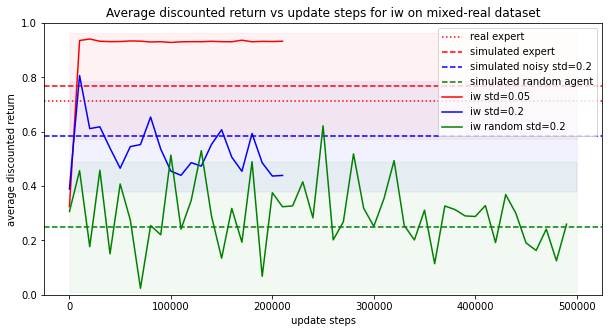

In [35]:
plt.figure(figsize=(10, 5))
plot_vs(all_returns[0], all_returns[1],all_returns[12], "iw")

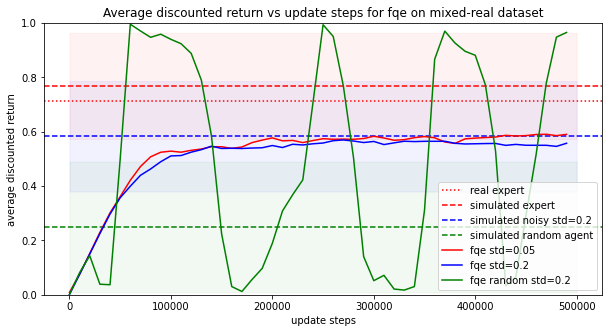

In [36]:
plt.figure(figsize=(10, 5))
plot_vs(all_returns[2], all_returns[3], all_returns[11], "fqe")

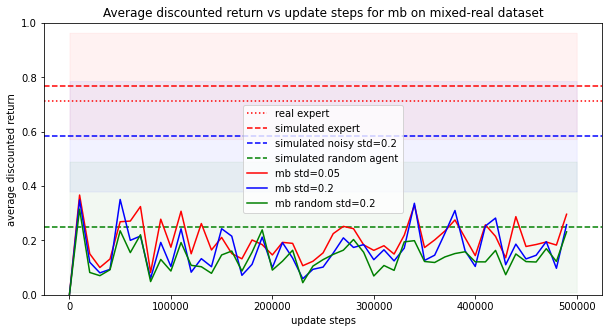

In [37]:
plt.figure(figsize=(10, 5))
plot_vs(all_returns[4], all_returns[5], all_returns[10], "mb")
#plt.axhline(y=np.mean(mixed_returns), color='g', linestyle='-', label='mixed')

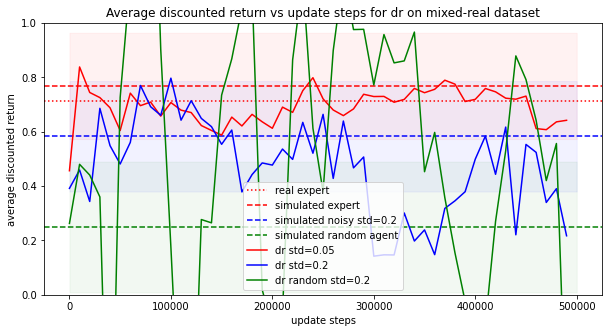

In [38]:
plt.figure(figsize=(10, 5))
plot_vs(all_returns[6], all_returns[7],all_returns[13], "dr")

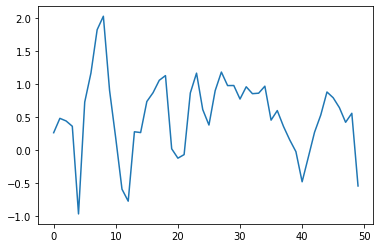

In [39]:
plt.plot(all_returns[13])
plt.show()

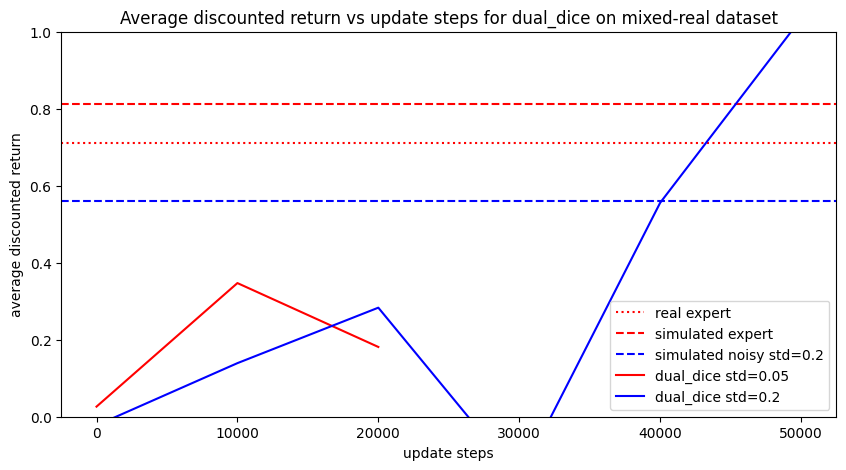

In [101]:
# plot dual dice
plt.figure(figsize=(10, 5))
plot_vs(all_returns[8], all_returns[9], "dual_dice")

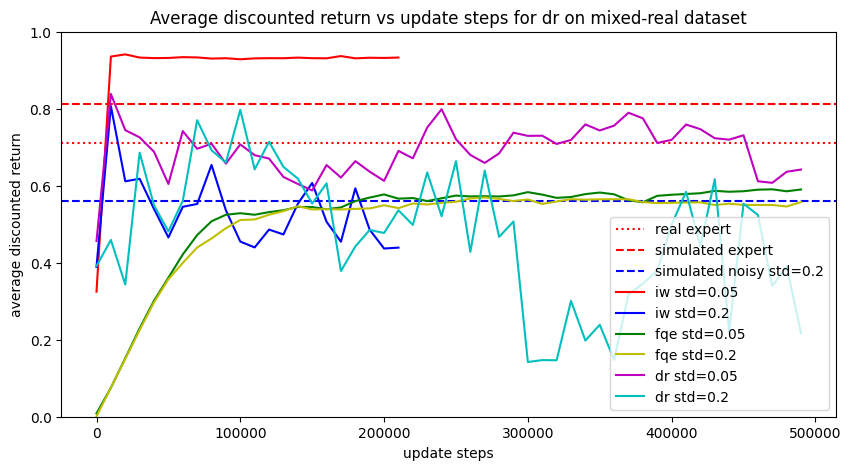

In [102]:
# plot fqe and dr and iw
plt.figure(figsize=(10, 5))
plot_vs(all_returns[0], all_returns[1], "iw")
plot_vs(all_returns[2], all_returns[3], "fqe", c1='g', c2='y')
plot_vs(all_returns[6], all_returns[7], "dr", c1='m', c2='c')